#### Clear Ram

In [2]:
import gc

In [3]:
gc.collect()

236

#### Load Libraries

In [4]:
import mne
import numpy as np
import pandas 
import os
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import math
import pywt

from utils import *
from matplotlib.patches import Rectangle
from sklearn.decomposition import PCA

random.seed(444)

### Load & Process Data

#### Define Data Paths

In [16]:
main_path = '/home/haziq/Desktop/Adil/Submissions/'
ab_edf_path = main_path + 'raw_data/edf/Abnormal EDF Files/'
n_edf_path = main_path + 'raw_data/edf/Normal EDF Files/'
ab_labels_path = main_path + 'raw_data/csv/SW & SSW CSV Files/'
save_path = main_path + 'ml_data/numpy arrays/'

In [17]:
class_label_names = ['normal', 'slowing', 'spike and wave']

#### Load Data from File

In [18]:
all_edf_data = np.concatenate((os.listdir(n_edf_path),os.listdir(ab_edf_path)), axis = 0)

In [19]:
# Line position for train and test

train_pos = 0
valid_pos = 496773
test_pos = 603225

In [20]:
w = pywt.Wavelet('db2')

In [21]:
train_window_data = []
train_window_labels = []

test_window_data = []
test_window_labels = []

normal_count = 0
slowing_count = 0
spike_count = 0

for edf_name in tqdm(all_edf_data):
    file_num = int(edf_name[:-4])
    
    if edf_name in os.listdir(ab_edf_path):
        edf_path = ab_edf_path
    else:
        edf_path = n_edf_path
    
    raw = mne.io.read_raw_edf(edf_path+edf_name,preload = True,exclude = ['A1','A2'])     # Importing all EEG Channels, exculding A1 A2 since matlab has already refrenced the channels with A1 and A2
    raw.filter(l_freq=1,h_freq=45)      # Bandpass filtering [1-45] Hz
    epochs=mne.make_fixed_length_epochs(raw,duration=2,overlap=1)
    epochs_data=epochs.get_data()
    
    data = np.array(raw.get_data()[0:19])
    print('epochs_data shape = ',epochs_data.shape)
    
    # Epochs_data = np.concatenate((Epochs_data, epochs_data), axis=0)

    with open(main_path + 'window_tracker.txt', 'r') as f:
        lines = f.readlines()
        for single_line in lines[train_pos+1:valid_pos]:
            single_line_list = single_line.split(' ')
            if edf_name == single_line_list[0]:
                
                data = epochs_data[int(single_line_list[2])][int(single_line_list[1])]
                pca = PCA(n_components = 2)
                decomp_levels = pywt.wavedec(data, wavelet=w,level = 4)
                feature_vector = []
                for k in range(len(decomp_levels)):
                    feature_vector.append(stat_features(decomp_levels[k]))
                feature_vector = np.array(feature_vector)
                pca.fit(feature_vector)
                pca_features = pca.fit_transform(feature_vector)
                train_window_data.append(np.array(pca_features.flatten()))

                train_window_labels.append(np.array(int(single_line_list[3])))
        
        for single_line in lines[valid_pos+1:test_pos]:
            single_line_list = single_line.split(' ')
            if edf_name == single_line_list[0]:
                
                data = epochs_data[int(single_line_list[2])][int(single_line_list[1])]
                pca = PCA(n_components = 2)
                decomp_levels = pywt.wavedec(data, wavelet=w,level = 4)
                feature_vector = []
                for k in range(len(decomp_levels)):
                    feature_vector.append(stat_features(decomp_levels[k]))
                feature_vector = np.array(feature_vector)
                pca.fit(feature_vector)
                pca_features = pca.fit_transform(feature_vector)
                train_window_data.append(np.array(pca_features.flatten()))

                train_window_labels.append(np.array(int(single_line_list[3])))
        
        for single_line in lines[test_pos+1:]:
            single_line_list = single_line.split(' ')
            if edf_name == single_line_list[0]:
                
                data = epochs_data[int(single_line_list[2])][int(single_line_list[1])]
                pca = PCA(n_components = 2)
                decomp_levels = pywt.wavedec(data, wavelet=w,level = 4)
                feature_vector = []
                for k in range(len(decomp_levels)):
                    feature_vector.append(stat_features(decomp_levels[k]))
                feature_vector = np.array(feature_vector)
                pca.fit(feature_vector)
                pca_features = pca.fit_transform(feature_vector)
                test_window_data.append(np.array(pca_features.flatten()))

                test_window_labels.append(np.array(int(single_line_list[3])))

    

 90%|████████▉ | 964/1075 [12:50<03:49,  2.06s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000137.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 71999  =      0.000 ...   359.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 400 original time points ..

 90%|████████▉ | 965/1075 [12:50<03:05,  1.69s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000131.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152999  =      0.000 ...   764.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
764 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 764 events and 400 original time points .

 90%|████████▉ | 966/1075 [12:51<02:26,  1.34s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000700.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points

 90%|████████▉ | 967/1075 [13:00<06:36,  3.67s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000437.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369999  =      0.000 ...  1849.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1849 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1849 events and 400 original time points

 90%|█████████ | 968/1075 [13:19<14:51,  8.33s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000764.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points .

 90%|█████████ | 969/1075 [13:25<13:04,  7.40s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000875.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 90%|█████████ | 970/1075 [13:26<09:36,  5.49s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000993.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 426199  =      0.000 ...  2130.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
2130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2130 events and 400 original time points

 90%|█████████ | 971/1075 [13:30<09:02,  5.22s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000330.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160799  =      0.000 ...   803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 803 events and 400 original time points .

 90%|█████████ | 972/1075 [13:31<06:30,  3.79s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000884.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points

 91%|█████████ | 973/1075 [13:42<10:05,  5.94s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000790.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 343199  =      0.000 ...  1715.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1715 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1715 events and 400 original time points

 91%|█████████ | 974/1075 [13:42<07:18,  4.34s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000026.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   839.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 839 events and 400 original time points .

 91%|█████████ | 975/1075 [13:43<05:22,  3.23s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000502.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167599  =      0.000 ...   837.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
837 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 837 events and 400 original time points .

 91%|█████████ | 976/1075 [13:43<04:00,  2.43s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000652.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points

 91%|█████████ | 977/1075 [13:44<03:14,  1.98s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000635.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75999  =      0.000 ...   379.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
379 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 379 events and 400 original time points ..

 91%|█████████ | 978/1075 [13:45<02:28,  1.53s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001086.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 91%|█████████ | 979/1075 [13:50<04:05,  2.55s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001024.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 375999  =      0.000 ...  1879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1879 events and 400 original time points

 91%|█████████ | 980/1075 [13:50<03:10,  2.00s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000353.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 187799  =      0.000 ...   938.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
938 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 938 events and 400 original time points .

 91%|█████████▏| 981/1075 [13:51<02:32,  1.62s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000361.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 146399  =      0.000 ...   731.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
731 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 731 events and 400 original time points .

 91%|█████████▏| 982/1075 [13:56<03:47,  2.45s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000403.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147399  =      0.000 ...   736.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
736 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 736 events and 400 original time points .

 91%|█████████▏| 983/1075 [14:00<04:53,  3.19s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001064.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 324999  =      0.000 ...  1624.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1624 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1624 events and 400 original time points

 92%|█████████▏| 984/1075 [14:03<04:44,  3.13s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000862.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 92%|█████████▏| 985/1075 [14:04<03:34,  2.38s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000864.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366599  =      0.000 ...  1832.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 400 original time points

 92%|█████████▏| 986/1075 [14:06<03:07,  2.10s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000637.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points

 92%|█████████▏| 987/1075 [14:06<02:31,  1.72s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000359.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81199  =      0.000 ...   405.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
405 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 405 events and 400 original time points ..

 92%|█████████▏| 988/1075 [14:07<01:54,  1.31s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000940.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points

 92%|█████████▏| 989/1075 [14:07<01:37,  1.14s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369599  =      0.000 ...  1847.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1847 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1847 events and 400 original time points

 92%|█████████▏| 990/1075 [14:09<01:35,  1.13s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000538.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168599  =      0.000 ...   842.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
842 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 842 events and 400 original time points .

 92%|█████████▏| 991/1075 [14:15<03:55,  2.80s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000386.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154599  =      0.000 ...   772.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
772 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 772 events and 400 original time points .

 92%|█████████▏| 992/1075 [14:16<03:07,  2.26s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000400.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194999  =      0.000 ...   974.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
974 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 974 events and 400 original time points .

 92%|█████████▏| 993/1075 [14:17<02:31,  1.85s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001082.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points

 92%|█████████▏| 994/1075 [14:18<02:01,  1.50s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000573.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...   903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 903 events and 400 original time points .

 93%|█████████▎| 995/1075 [14:19<01:53,  1.42s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001066.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 265999  =      0.000 ...  1329.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1329 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1329 events and 400 original time points

 93%|█████████▎| 996/1075 [14:20<01:39,  1.26s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000556.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144799  =      0.000 ...   723.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
723 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 723 events and 400 original time points .

 93%|█████████▎| 997/1075 [14:20<01:20,  1.03s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000599.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 113999  =      0.000 ...   569.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
569 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 569 events and 400 original time points .

 93%|█████████▎| 998/1075 [14:21<01:03,  1.21it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000586.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141399  =      0.000 ...   706.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 400 original time points .

 93%|█████████▎| 999/1075 [14:22<01:03,  1.20it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001020.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81599  =      0.000 ...   407.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
407 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 407 events and 400 original time points ..

 93%|█████████▎| 1000/1075 [14:22<00:54,  1.37it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000510.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170199  =      0.000 ...   850.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
850 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 850 events and 400 original time points .

 93%|█████████▎| 1001/1075 [14:23<01:05,  1.13it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000620.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points .

 93%|█████████▎| 1002/1075 [14:24<00:55,  1.32it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000247.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169599  =      0.000 ...   847.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
847 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 847 events and 400 original time points .

 93%|█████████▎| 1003/1075 [14:26<01:15,  1.05s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000623.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300199  =      0.000 ...  1500.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1500 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1500 events and 400 original time points

 93%|█████████▎| 1004/1075 [14:27<01:11,  1.01s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001022.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 93%|█████████▎| 1005/1075 [14:46<07:29,  6.42s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000243.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160599  =      0.000 ...   802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 802 events and 400 original time points .

 94%|█████████▎| 1006/1075 [14:46<05:19,  4.63s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000127.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104399  =      0.000 ...   521.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
521 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 521 events and 400 original time points .

 94%|█████████▎| 1007/1075 [14:50<04:59,  4.40s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000180.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99199  =      0.000 ...   495.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
495 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 495 events and 400 original time points ..

 94%|█████████▍| 1008/1075 [14:50<03:34,  3.19s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000851.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 94%|█████████▍| 1009/1075 [14:51<02:43,  2.48s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000444.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139399  =      0.000 ...   696.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 696 events and 400 original time points .

 94%|█████████▍| 1010/1075 [14:52<02:07,  1.97s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001065.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 295199  =      0.000 ...  1475.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1475 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1475 events and 400 original time points

 94%|█████████▍| 1011/1075 [14:52<01:39,  1.55s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000627.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 287999  =      0.000 ...  1439.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1439 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1439 events and 400 original time points

 94%|█████████▍| 1012/1075 [14:55<01:57,  1.87s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000250.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192599  =      0.000 ...   962.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
962 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 962 events and 400 original time points .

 94%|█████████▍| 1013/1075 [14:56<01:39,  1.60s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000753.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372799  =      0.000 ...  1863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1863 events and 400 original time points

 94%|█████████▍| 1014/1075 [14:58<01:38,  1.62s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000219.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172399  =      0.000 ...   861.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
861 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 861 events and 400 original time points .

 94%|█████████▍| 1015/1075 [14:58<01:16,  1.27s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001072.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points

 95%|█████████▍| 1016/1075 [14:59<01:03,  1.08s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000964.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366599  =      0.000 ...  1832.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 400 original time points

 95%|█████████▍| 1017/1075 [15:08<03:17,  3.40s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000951.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124599  =      0.000 ...   622.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
622 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 622 events and 400 original time points .

 95%|█████████▍| 1018/1075 [15:09<02:45,  2.90s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000217.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 202599  =      0.000 ...  1012.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1012 events and 400 original time points

 95%|█████████▍| 1019/1075 [15:11<02:28,  2.65s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000598.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108199  =      0.000 ...   540.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 400 original time points .

 95%|█████████▍| 1020/1075 [15:12<01:47,  1.96s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001071.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136199  =      0.000 ...   680.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 680 events and 400 original time points .

 95%|█████████▍| 1021/1075 [15:12<01:20,  1.49s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000624.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184399  =      0.000 ...   921.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
921 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 921 events and 400 original time points .

 95%|█████████▌| 1022/1075 [15:13<01:03,  1.19s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000585.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172999  =      0.000 ...   864.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
864 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 864 events and 400 original time points .

 95%|█████████▌| 1023/1075 [15:13<00:50,  1.02it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167399  =      0.000 ...   836.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
836 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 836 events and 400 original time points .

 95%|█████████▌| 1024/1075 [15:14<00:42,  1.19it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000519.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180599  =      0.000 ...   902.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
902 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 902 events and 400 original time points .

 95%|█████████▌| 1025/1075 [15:14<00:37,  1.35it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000926.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 95%|█████████▌| 1026/1075 [15:15<00:35,  1.38it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000138.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95999  =      0.000 ...   479.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
479 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 479 events and 400 original time points ..

 96%|█████████▌| 1027/1075 [15:16<00:39,  1.22it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000638.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points

 96%|█████████▌| 1028/1075 [15:17<00:43,  1.09it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000952.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300599  =      0.000 ...  1502.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1502 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1502 events and 400 original time points

 96%|█████████▌| 1029/1075 [15:22<01:39,  2.17s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000925.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 200399  =      0.000 ...  1001.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1001 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1001 events and 400 original time points

 96%|█████████▌| 1030/1075 [15:25<01:45,  2.35s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001090.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points

 96%|█████████▌| 1031/1075 [15:26<01:33,  2.12s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000948.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points

 96%|█████████▌| 1032/1075 [15:27<01:13,  1.72s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000676.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 390199  =      0.000 ...  1950.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1950 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1950 events and 400 original time points

 96%|█████████▌| 1033/1075 [15:28<01:03,  1.50s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104799  =      0.000 ...   523.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
523 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 523 events and 400 original time points .

 96%|█████████▌| 1034/1075 [15:29<00:50,  1.22s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000391.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165599  =      0.000 ...   827.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
827 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 827 events and 400 original time points .

 96%|█████████▋| 1035/1075 [15:31<00:55,  1.40s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000245.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158399  =      0.000 ...   791.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
791 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 791 events and 400 original time points .

 96%|█████████▋| 1036/1075 [15:31<00:43,  1.12s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000337.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117199  =      0.000 ...   585.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
585 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 585 events and 400 original time points .

 96%|█████████▋| 1037/1075 [15:33<00:46,  1.23s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points .

 97%|█████████▋| 1038/1075 [15:33<00:36,  1.00it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000965.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 430799  =      0.000 ...  2153.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
2153 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2153 events and 400 original time points

 97%|█████████▋| 1039/1075 [15:34<00:33,  1.07it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000873.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 97%|█████████▋| 1040/1075 [15:35<00:33,  1.04it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000765.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 244599  =      0.000 ...  1222.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1222 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1222 events and 400 original time points

 97%|█████████▋| 1041/1075 [15:36<00:38,  1.13s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000827.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points

 97%|█████████▋| 1042/1075 [15:37<00:32,  1.00it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000306.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 142799  =      0.000 ...   713.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
713 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 713 events and 400 original time points .

 97%|█████████▋| 1043/1075 [15:38<00:35,  1.11s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000281.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175999  =      0.000 ...   879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 879 events and 400 original time points .

 97%|█████████▋| 1044/1075 [15:41<00:44,  1.43s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000112.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152199  =      0.000 ...   760.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
760 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 760 events and 400 original time points .

 97%|█████████▋| 1045/1075 [15:41<00:33,  1.13s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001018.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 340399  =      0.000 ...  1701.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1701 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1701 events and 400 original time points

 97%|█████████▋| 1046/1075 [15:42<00:29,  1.00s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000919.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 309399  =      0.000 ...  1546.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1546 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1546 events and 400 original time points

 97%|█████████▋| 1047/1075 [15:43<00:27,  1.02it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000734.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points

 97%|█████████▋| 1048/1075 [15:44<00:25,  1.04it/s]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000289.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 370399  =      0.000 ...  1851.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1851 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1851 events and 400 original time points

 98%|█████████▊| 1049/1075 [15:48<00:50,  1.95s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000376.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 225999  =      0.000 ...  1129.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1129 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1129 events and 400 original time points

 98%|█████████▊| 1050/1075 [15:49<00:45,  1.82s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000621.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180199  =      0.000 ...   900.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 400 original time points .

 98%|█████████▊| 1051/1075 [15:50<00:33,  1.41s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000634.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 268599  =      0.000 ...  1342.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1342 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1342 events and 400 original time points

 98%|█████████▊| 1052/1075 [15:51<00:30,  1.32s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000893.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

 98%|█████████▊| 1053/1075 [16:02<01:33,  4.26s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000743.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points

 98%|█████████▊| 1054/1075 [16:04<01:11,  3.43s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000594.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 65199  =      0.000 ...   325.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
325 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 325 events and 400 original time points ..

 98%|█████████▊| 1055/1075 [16:04<00:50,  2.52s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000494.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 230199  =      0.000 ...  1150.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1150 events and 400 original time points

 98%|█████████▊| 1056/1075 [16:05<00:39,  2.10s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000472.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 335399  =      0.000 ...  1676.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1676 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1676 events and 400 original time points

 98%|█████████▊| 1057/1075 [16:06<00:30,  1.67s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000577.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175199  =      0.000 ...   875.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
875 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 875 events and 400 original time points .

 98%|█████████▊| 1058/1075 [16:11<00:46,  2.74s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000681.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283799  =      0.000 ...  1418.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1418 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1418 events and 400 original time points

 99%|█████████▊| 1059/1075 [16:11<00:33,  2.08s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000222.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 276799  =      0.000 ...  1383.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1383 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1383 events and 400 original time points

 99%|█████████▊| 1060/1075 [16:12<00:24,  1.64s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000680.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 252599  =      0.000 ...  1262.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1262 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1262 events and 400 original time points

 99%|█████████▊| 1061/1075 [16:13<00:18,  1.35s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000507.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 280399  =      0.000 ...  1401.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1401 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1401 events and 400 original time points

 99%|█████████▉| 1062/1075 [16:15<00:19,  1.49s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001029.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 574599  =      0.000 ...  2872.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
2872 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2872 events and 400 original time points

 99%|█████████▉| 1063/1075 [16:16<00:17,  1.48s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000744.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points

 99%|█████████▉| 1064/1075 [16:18<00:17,  1.57s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000956.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 450799  =      0.000 ...  2253.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
2253 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2253 events and 400 original time points

 99%|█████████▉| 1065/1075 [16:19<00:13,  1.36s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000750.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94999  =      0.000 ...   474.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
474 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 474 events and 400 original time points ..

 99%|█████████▉| 1066/1075 [16:20<00:11,  1.25s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000908.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points

 99%|█████████▉| 1067/1075 [16:20<00:08,  1.11s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000266.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108599  =      0.000 ...   542.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
542 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 542 events and 400 original time points .

 99%|█████████▉| 1068/1075 [16:23<00:09,  1.40s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000545.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191999  =      0.000 ...   959.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
959 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 959 events and 400 original time points .

 99%|█████████▉| 1069/1075 [16:23<00:06,  1.15s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000354.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points .

100%|█████████▉| 1070/1075 [16:24<00:05,  1.17s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0001041.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 217199  =      0.000 ...  1085.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1085 events and 400 original time points

100%|█████████▉| 1071/1075 [16:27<00:06,  1.59s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000570.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157799  =      0.000 ...   788.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
788 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 788 events and 400 original time points .

100%|█████████▉| 1072/1075 [16:28<00:04,  1.46s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168799  =      0.000 ...   843.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 843 events and 400 original time points .

100%|█████████▉| 1073/1075 [16:29<00:02,  1.21s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000828.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points

100%|█████████▉| 1074/1075 [16:30<00:01,  1.30s/it]

Extracting EDF parameters from /home/haziq/Desktop/Adil/Submissions/raw_data/edf/Abnormal EDF Files/0000278.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157399  =      0.000 ...   786.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 sec)

Not setting metadata
786 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 786 events and 400 original time points .

100%|██████████| 1075/1075 [16:31<00:00,  1.08it/s]


In [22]:
# Save
np.save(save_path + 'X_train.npy', train_window_data)
np.save(save_path + 'X_test.npy', test_window_data)

np.save(save_path + 'y_train.npy', train_window_labels)
np.save(save_path + 'y_test.npy', test_window_labels)

In [23]:
gc.collect

<function gc.collect(generation=2)>

In [24]:
X_train = np.load(save_path + 'X_train.npy')
y_train = np.load(save_path + 'y_train.npy')

X_test = np.load(save_path + 'X_test.npy')
y_test = np.load(save_path + 'y_test.npy')

In [25]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(603221, 10)
(603221,)
(106450, 10)
(106450,)


#### Standardize Data

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mm_sc = MinMaxScaler()

In [27]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

mm_sc.fit(X_train)
X_train_mm_sc = mm_sc.transform(X_train)
X_test_mm_sc = mm_sc.transform(X_test)

### Model Implementation

#### Accuracy Metrics and Confusion Matrix

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

In [29]:
def plot_confusion_matrix(cm, classes = [0, 1, 2],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.rcParams['figure.dpi'] = 150

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train), digits=5)))
        cm = confusion_matrix(y_train, clf.predict(X_train))
        plot_confusion_matrix(cm)
        
    elif train == False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test), digits=5)))
        cm = confusion_matrix(y_test, clf.predict(X_test))
        plot_confusion_matrix(cm)

#### Model 1: Simple Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
cart_clf = DecisionTreeClassifier(criterion='entropy',max_features = 'sqrt',random_state = 0,max_depth=5,min_samples_leaf=1,splitter = 'best')

In [110]:
cart_clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=0)

In [111]:
#print_score(cart_clf, X_train_sc, y_train, X_test_sc, y_test, train = True)

Test Result:

accuracy score: 0.7157

Classification Report: 
               precision    recall  f1-score   support

           0    0.81550   0.88028   0.84665     63850
           1    0.52102   0.52418   0.52259     24425
           2    0.55415   0.39499   0.46123     18175

    accuracy                        0.71572    106450
   macro avg    0.63022   0.59982   0.61016    106450
weighted avg    0.70331   0.71572   0.70649    106450


Confusion matrix, without normalization
[[56206  5154  2490]
 [ 8336 12803  3286]
 [ 4380  6616  7179]]


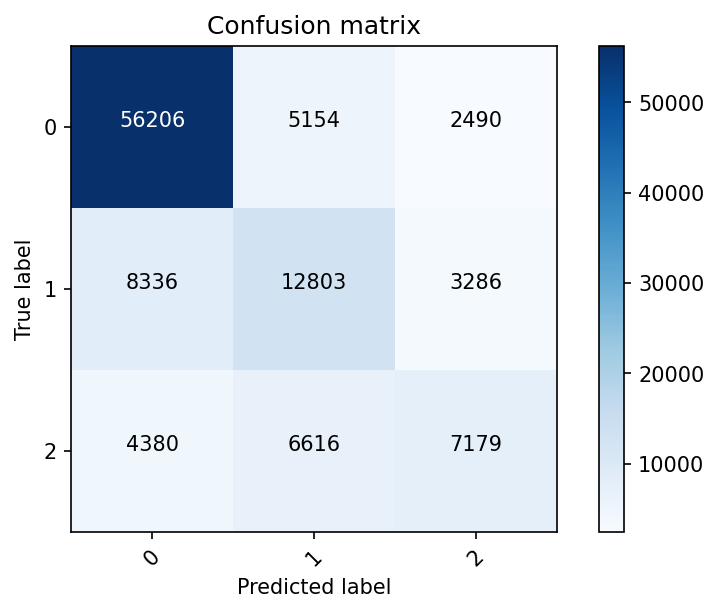

In [112]:
print_score(cart_clf, X_train_sc, y_train, X_test_sc, y_test, train = False)

#### Model 2: Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf_clf = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features = 'sqrt',random_state = 0,max_depth=7,min_samples_leaf=2)
rf_clf.fit(X_train_sc, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=2, random_state=0)

In [119]:
#print_score(rf_clf, X_train_sc, y_train, X_test_sc, y_test, train = True)

Test Result:

accuracy score: 0.7497

Classification Report: 
               precision    recall  f1-score   support

           0    0.85695   0.86542   0.86116     63850
           1    0.59738   0.60016   0.59877     24425
           2    0.56713   0.54388   0.55526     18175

    accuracy                        0.74966    106450
   macro avg    0.67382   0.66982   0.67173    106450
weighted avg    0.74791   0.74966   0.74873    106450


Confusion matrix, without normalization
[[55257  5264  3329]
 [ 5550 14659  4216]
 [ 3674  4616  9885]]


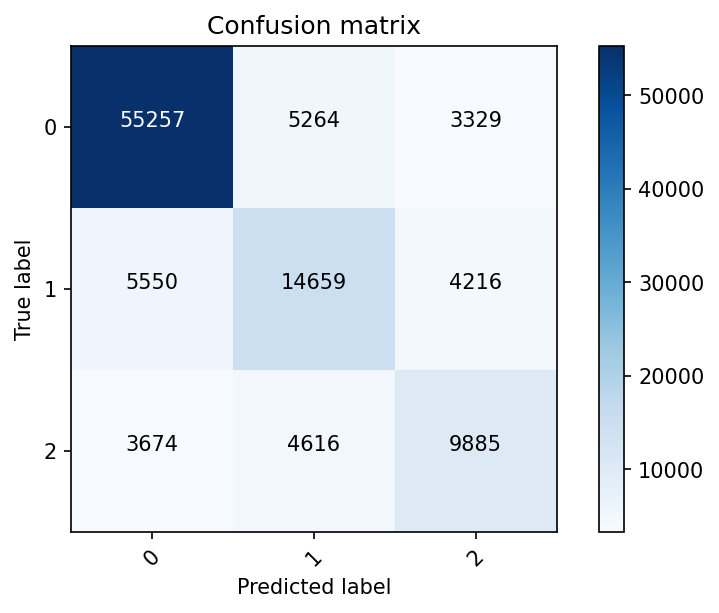

In [120]:
print_score(rf_clf, X_train_sc, y_train, X_test_sc, y_test, train = False)                                     

#### Model 3: Linear SVM

In [121]:
from sklearn import svm

In [126]:
svm_clf = svm.SVC(kernel='linear',decision_function_shape = 'ovr',gamma='auto',random_state=0, C = 2.0,verbose=True)
svm_clf.fit(X_train_mm_sc, y_train)

[LibSVM].............................................................................................................................
*.....
*.
*..
*.
*
optimization finished, #iter = 134195
obj = -429619.807713, rho = 9.288405
nSV = 215935, nBSV = 215910
...........................................................................................
*.
*.....
*.
*
optimization finished, #iter = 97397
obj = -316016.763837, rho = -0.073600
nSV = 158160, nBSV = 158135
..............................................................................................
*.......
*.
*....
*...
*..
*.
*.
*
optimization finished, #iter = 111250
obj = -319130.212383, rho = -12.692044
nSV = 162164, nBSV = 162142
Total nSV = 341074


SVC(C=2.0, gamma='auto', kernel='linear', random_state=0, verbose=True)

Test Result:

accuracy score: 0.7188

Classification Report: 
               precision    recall  f1-score   support

           0    0.76528   0.91663   0.83415     63850
           1    0.58654   0.44217   0.50423     24425
           2    0.62185   0.39549   0.48349     18175

    accuracy                        0.71879    106450
   macro avg    0.65789   0.58476   0.60729    106450
weighted avg    0.69978   0.71879   0.69857    106450


Confusion matrix, without normalization
[[58527  3429  1894]
 [11148 10800  2477]
 [ 6803  4184  7188]]


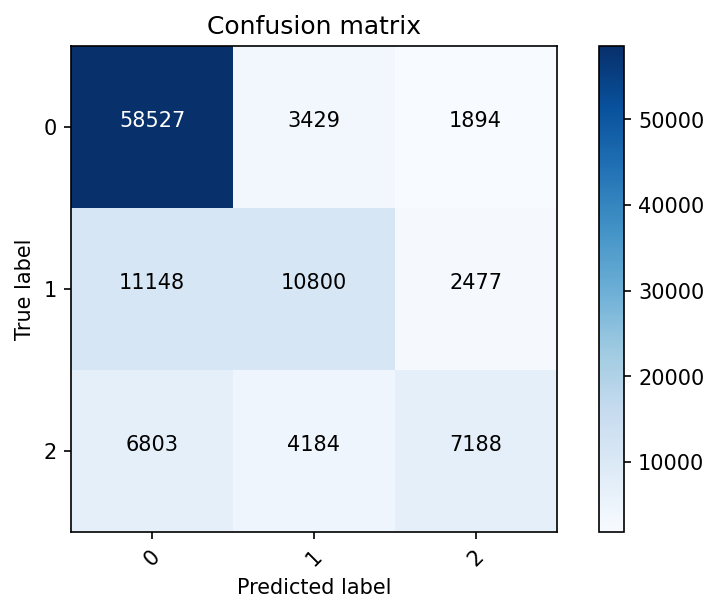

In [127]:
print_score(svm_clf, X_train_mm_sc, y_train, X_test_mm_sc, y_test, train = False)

END

**Signed By:**

Muiz Alvi <br><br>
Adil Jowad Qureshi